In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataframe = pd.read_csv('train.csv', delimiter=",")

In [2]:
dataframe.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
dataframe.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

In [4]:
# Preprocess the data
features = dataframe.drop(columns=['critical_temp'])
target = dataframe['critical_temp']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=1/3, random_state=42)

# Normalize the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Critical Temp')

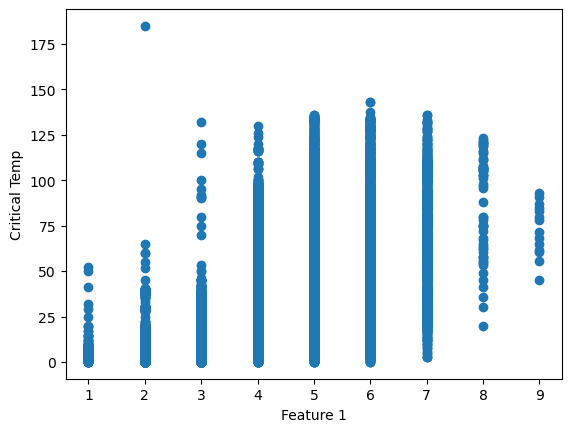

In [5]:
# Visualize the data
plt.scatter(dataframe.iloc[:, 0], dataframe.iloc[:, -1])

plt.xlabel('Feature 1')
plt.ylabel('Critical Temp')
#plt.show()

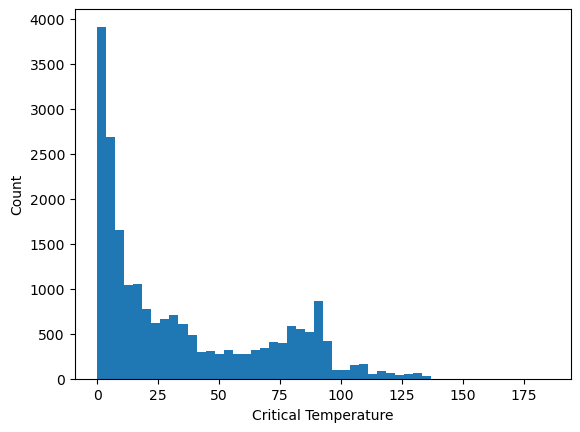

In [6]:
# Histogram of the target variable (critical temperature)
plt.hist(dataframe.iloc[:, -1], bins=50)
plt.xlabel('Critical Temperature')
plt.ylabel('Count')
plt.show()

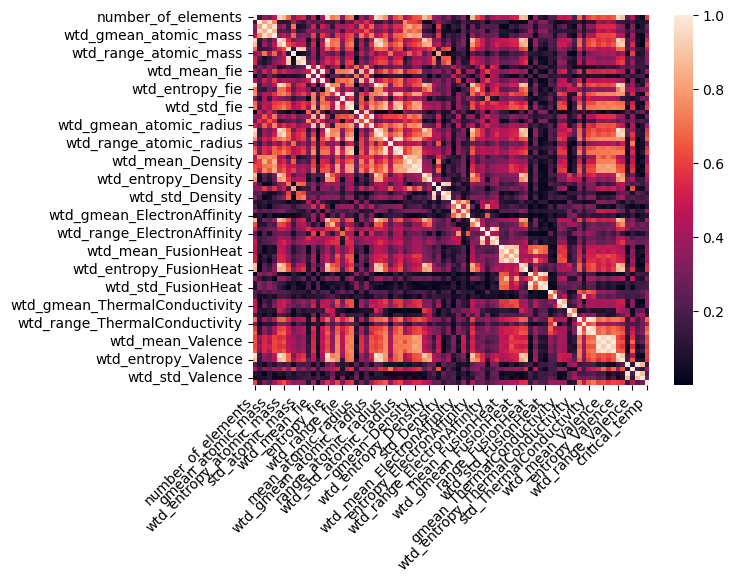

In [7]:
# Correlation matrix heatmap
corr = dataframe.corr().abs()
# sns.heatmap(corr, annot=True)
sns.heatmap(corr)
plt.xticks(rotation=45, ha='right')
plt.show()

### ANN with the Keras

It first defines a function called create_model that creates and compiles a sequential neural network model with the specified number of neurons, layers, and regularization parameters. This function is then used to create a KerasRegressor object, which can be used with scikit-learn's GridSearchCV function.

The param_grid dictionary specifies the hyperparameters to search over, including the number of neurons, number of layers, and L1 and L2 regularization parameters.

The GridSearchCV function is called with the model and param_grid objects, along with other arguments such as the number of jobs to run in parallel and the number of cross-validation folds. The fit method is called on this grid object to perform the search over all possible combinations of hyperparameters.

The best model is identified using the best_score_ and best_params_ attributes of the grid_result object, which are then printed to the console.

In [13]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l1_l2

def create_model(neurons=64, layers=2, l1_reg=0.001, l2_reg=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    for i in range(layers-1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', metrics=['mean_squared_error'],optimizer=Adam(learning_rate=0.001))
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)

param_grid = {
    'neurons': [64],
    'layers': [4,6],
    'l1_reg': [0.001, 0.001],
    'l2_reg': [0.001, 0.001]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\xieji\AppData\Local\Temp\ipykernel_19828\4155858669.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best: -263.615845 using {'l1_reg': 0.001, 'l2_reg': 0.001, 'layers': 6, 'neurons': 64}


In [15]:
# Create a new model with the best hyperparameters
best_model = create_model(layers=grid_result.best_params_['layers'],
                          neurons=grid_result.best_params_['neurons'],
                          l1_reg=grid_result.best_params_['l1_reg'],
                          l2_reg=grid_result.best_params_['l2_reg'])

# Train the model on the training set
history = best_model.fit(X_train, y_train, epochs=100, batch_size=64)

# Evaluate the model on the training and test sets
train_loss = best_model.evaluate(X_train, y_train)
test_loss = best_model.evaluate(X_test, y_test)

print('Training Loss:', train_loss)
print('Test Loss:', test_loss)

Epoch 1/100
222/222 [==============================] - 1s 2ms/step - loss: 546.6537 - mean_squared_error: 543.7397
Epoch 2/100
222/222 [==============================] - 0s 2ms/step - loss: 247.1991 - mean_squared_error: 244.4207
Epoch 3/100
222/222 [==============================] - 0s 2ms/step - loss: 228.0760 - mean_squared_error: 225.3300
Epoch 4/100
222/222 [==============================] - 0s 2ms/step - loss: 215.6572 - mean_squared_error: 212.9289
Epoch 5/100
222/222 [==============================] - 0s 2ms/step - loss: 201.3950 - mean_squared_error: 198.6772
Epoch 6/100
222/222 [==============================] - 0s 2ms/step - loss: 193.3262 - mean_squared_error: 190.6066
Epoch 7/100
222/222 [==============================] - 0s 2ms/step - loss: 189.1359 - mean_squared_error: 186.4114
Epoch 8/100
222/222 [==============================] - 0s 2ms/step - loss: 181.2805 - mean_squared_error: 178.5543
Epoch 9/100
222/222 [==============================] - 0s 2ms/step - loss: 175.2

222/222 [==============================] - 0s 2ms/step - loss: 90.2802 - mean_squared_error: 86.9008
Epoch 73/100
222/222 [==============================] - 0s 2ms/step - loss: 89.6955 - mean_squared_error: 86.3079
Epoch 74/100
222/222 [==============================] - 0s 2ms/step - loss: 89.3196 - mean_squared_error: 85.9215
Epoch 75/100
222/222 [==============================] - 0s 2ms/step - loss: 90.8371 - mean_squared_error: 87.4311
Epoch 76/100
222/222 [==============================] - 0s 2ms/step - loss: 89.5981 - mean_squared_error: 86.1838
Epoch 77/100
222/222 [==============================] - 0s 2ms/step - loss: 90.9724 - mean_squared_error: 87.5498
Epoch 78/100
222/222 [==============================] - 0s 2ms/step - loss: 90.2761 - mean_squared_error: 86.8442
Epoch 79/100
222/222 [==============================] - 0s 2ms/step - loss: 89.3499 - mean_squared_error: 85.9091
Epoch 80/100
222/222 [==============================] - 0s 2ms/step - loss: 88.4986 - mean_squared_er

In the create_model function the 'model.compile(loss='mean_squared_error', metrics=['mean_squared_error'],optimizer=Adam(learning_rate=0.001))' sets the model's loss function to mean squared error, the optimizer to Adam with a learning rate of 0.001, and additionally specifies that during training the model should also compute the mean squared error metric. 